In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import modules
import tensorflow as tf
from tensorflow import keras
import os, datetime

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Shape is: (28, 28)


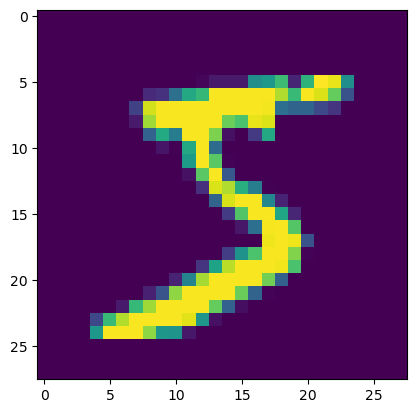

First Digit in y_train is 5


In [5]:
print("Shape is:", x_train[0].shape)
#print("Sample data from data set is:\n",x_train[0])
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print("First Digit in y_train is",y_train[0])

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train[0]

In [7]:
#def create_model():
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),tf.keras.layers.Dense(512, activation='relu'),tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10, activation='softmax')])

In [8]:
#model=create_model()
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [9]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [11]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
checkpoint_path, monitor='val_acc', verbose=1, save_weights_only=True,
# Save weights, every epoch.
save_freq='epoch')

In [12]:
history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test), callbacks=[tensorboard_callback, checkpoint_callback])
loss, acc = model.evaluate(x_test, y_test,verbose=1)
print("Original model, accuracy: {:5.2f}%".format(100*acc))

Epoch 1/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.2170 - accuracy: 0.9355
Epoch 1: saving model to training_2\cp-0001.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2169 - accuracy: 0.9355 - val_loss: 0.1113 - val_accuracy: 0.9678
Epoch 2/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.0947 - accuracy: 0.9719
Epoch 2: saving model to training_2\cp-0002.ckpt
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0948 - accuracy: 0.9719 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 3/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.0681 - accuracy: 0.9785
Epoch 3: saving model to training_2\cp-0003.ckpt
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0681 - accuracy: 0.9785 - val_loss: 0.0675 - val_accuracy: 0.9794
Epoch 4/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.0530 - accuracy: 0.9834
Epoch 4: saving model to training_2\cp-0004.ckpt
1875/1875 [===

In [13]:
model.save('MyModel',save_format='tf')

INFO:tensorflow:Assets written to: MyModel\assets


INFO:tensorflow:Assets written to: MyModel\assets


In [14]:
loaded_model = tf.keras.models.load_model('MyModel')
loaded_loss, loaded_acc = loaded_model.evaluate(x_test, y_test,verbose=1)
print("Loaded model, accuracy: {:5.2f}%".format(100*loaded_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9804
Loaded model, accuracy: 98.04%


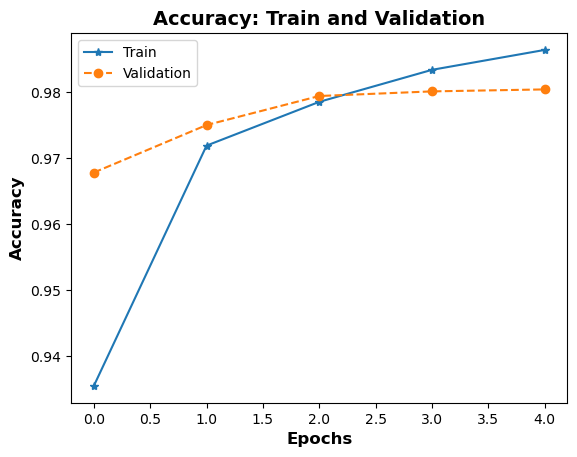

In [15]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'],'-*')
plt.plot(history.history['val_accuracy'],'--o')
plt.title('Accuracy: Train and Validation', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.legend(["Train","Validation"], loc="upper left")
plt.show()